In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import matplotlib.style as style

In [2]:
# Read in the CSV files
health = "Resources/2.12_Health_systems.csv"
happiness16 = "Resources/2016.csv"

health_df = pd.read_csv(health)
happiness16_df = pd.read_csv(happiness16)

In [3]:
health_df

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,US,Virgin Islands,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN
207,NaN,NaN,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,NaN
208,Zambia,NaN,Zambia,4.5,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN


In [4]:
# Organize Health column names
health_rename = health_df.rename(columns = {"Country_Region" : "Country", 
                                            "Health_exp_pct_GDP_2016" : "Health Expenditure % - GDP",         
                                            "Health_exp_public_pct_2016": "Health Expenditure Public %", 
                                            "Health_exp_out_of_pocket_pct_2016" : "Health EXP Out of Pocket %", 
                                            "External_health_exp_pct_2016" : "External Health Expenditure %", 
                                            "Physicians_per_1000_2009-18" : "Physicians per 1000",
                                            "Nurse_midwife_per_1000_2009-18" : "Nurse Midwife per 1000",
                                            "Specialist_surgical_per_1000_2008-18" : "Specialist Surgical per 1000",
                                            "Completeness_of_birth_reg_2009-18" : "Completeness of Birth Reg",
                                            "Completeness_of_death_reg_2008-16" : "Completeness of Death Reg", 
                                            "per_capita_exp_PPP_2016" : "Per Capita Expeniture by PPP",                       
                                            "Health_exp_per_capita_USD_2016" : "Health Expenditure Per Capita($)"
                                            })


In [5]:
# Organize Happiness column names
happiness16_df.rename(columns = {'Country':'Country'})
happiness16_df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [6]:
# Merge Data on Country
merged_dfs = pd.merge(happiness16_df, health_rename, on ='Country', how ='left')
merged_dfs

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,84.1,13.7,5565.6,5093.0,NaN,4.5,10.3,69.0,100.0,98.0
1,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,62.8,29.6,9836.0,7867.4,NaN,4.2,17.3,94.8,100.0,100.0
4,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,81.5,16.9,5063.6,4245.1,0.0,4.0,15.7,101.6,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,...,20.5,43.5,30.4,83.5,30.5,0.2,0.6,1.9,85.6,NaN
164,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
165,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,...,20.0,50.4,38.8,99.9,20.7,0.0,0.3,0.5,78.0,NaN
166,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,...,NaN,NaN,NaN,NaN,NaN,1.2,1.5,NaN,NaN,92.0


In [7]:
# Drop duplicated data
dropped_dup_merged_dfs = merged_dfs.drop_duplicates(subset =['Country'], keep = 'first').reset_index(drop= True)
dropped_dup_merged_dfs

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,84.1,13.7,5565.6,5093.0,NaN,4.5,10.3,69.0,100.0,98.0
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,62.8,29.6,9836.0,7867.4,NaN,4.2,17.3,94.8,100.0,100.0
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,81.5,16.9,5063.6,4245.1,0.0,4.0,15.7,101.6,100.0,100.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,85.1,14.5,7477.9,6203.5,0.0,4.6,18.1,67.2,100.0,100.0
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,77.4,20.4,4117.3,4112.1,0.0,3.8,14.7,76.3,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,...,20.5,43.5,30.4,83.5,30.5,0.2,0.6,1.9,85.6,NaN
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,...,20.0,50.4,38.8,99.9,20.7,0.0,0.3,0.5,78.0,NaN
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,...,NaN,NaN,NaN,NaN,NaN,1.2,1.5,NaN,NaN,92.0


In [8]:
# New Data Cleaned Columns
dropped_dup_merged_dfs.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Province_State', 'World_Bank_Name',
       'Health Expenditure % - GDP', 'Health Expenditure Public %',
       'Health EXP Out of Pocket %', 'Health Expenditure Per Capita($)',
       'Per Capita Expeniture by PPP', 'External Health Expenditure %',
       'Physicians per 1000', 'Nurse Midwife per 1000',
       'Specialist Surgical per 1000', 'Completeness of Birth Reg',
       'Completeness of Death Reg'],
      dtype='object')

In [9]:
# Drop rows with NaN values for the columns needed
cleaned_df = dropped_dup_merged_dfs.dropna(subset=['Happiness Score', 'Health (Life Expectancy)', 'Health Expenditure Public %', 'Health EXP Out of Pocket %', 'Health Expenditure Per Capita($)', 'Physicians per 1000']).reset_index(drop= True)

cleaned_df


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Health Expenditure Public %,Health EXP Out of Pocket %,Health Expenditure Per Capita($),Per Capita Expeniture by PPP,External Health Expenditure %,Physicians per 1000,Nurse Midwife per 1000,Specialist Surgical per 1000,Completeness of Birth Reg,Completeness of Death Reg
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,84.1,13.7,5565.6,5093.0,NaN,4.5,10.3,69.0,100.0,98.0
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,62.8,29.6,9836.0,7867.4,NaN,4.2,17.3,94.8,100.0,100.0
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,81.5,16.9,5063.6,4245.1,0.0,4.0,15.7,101.6,100.0,100.0
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,85.1,14.5,7477.9,6203.5,0.0,4.6,18.1,67.2,100.0,100.0
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,77.4,20.4,4117.3,4112.1,0.0,3.8,14.7,76.3,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Rwanda,Sub-Saharan Africa,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,...,33.9,6.4,48.1,130.4,50.6,0.1,0.8,0.8,56.0,NaN
129,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,...,20.5,43.5,30.4,83.5,30.5,0.2,0.6,1.9,85.6,NaN
130,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
131,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,...,20.0,50.4,38.8,99.9,20.7,0.0,0.3,0.5,78.0,NaN


## Out of Pocket Health Expenditure and Happiness

Text(0, 0.5, 'Out of Pocket Expenditure (%) and Happiness Score')

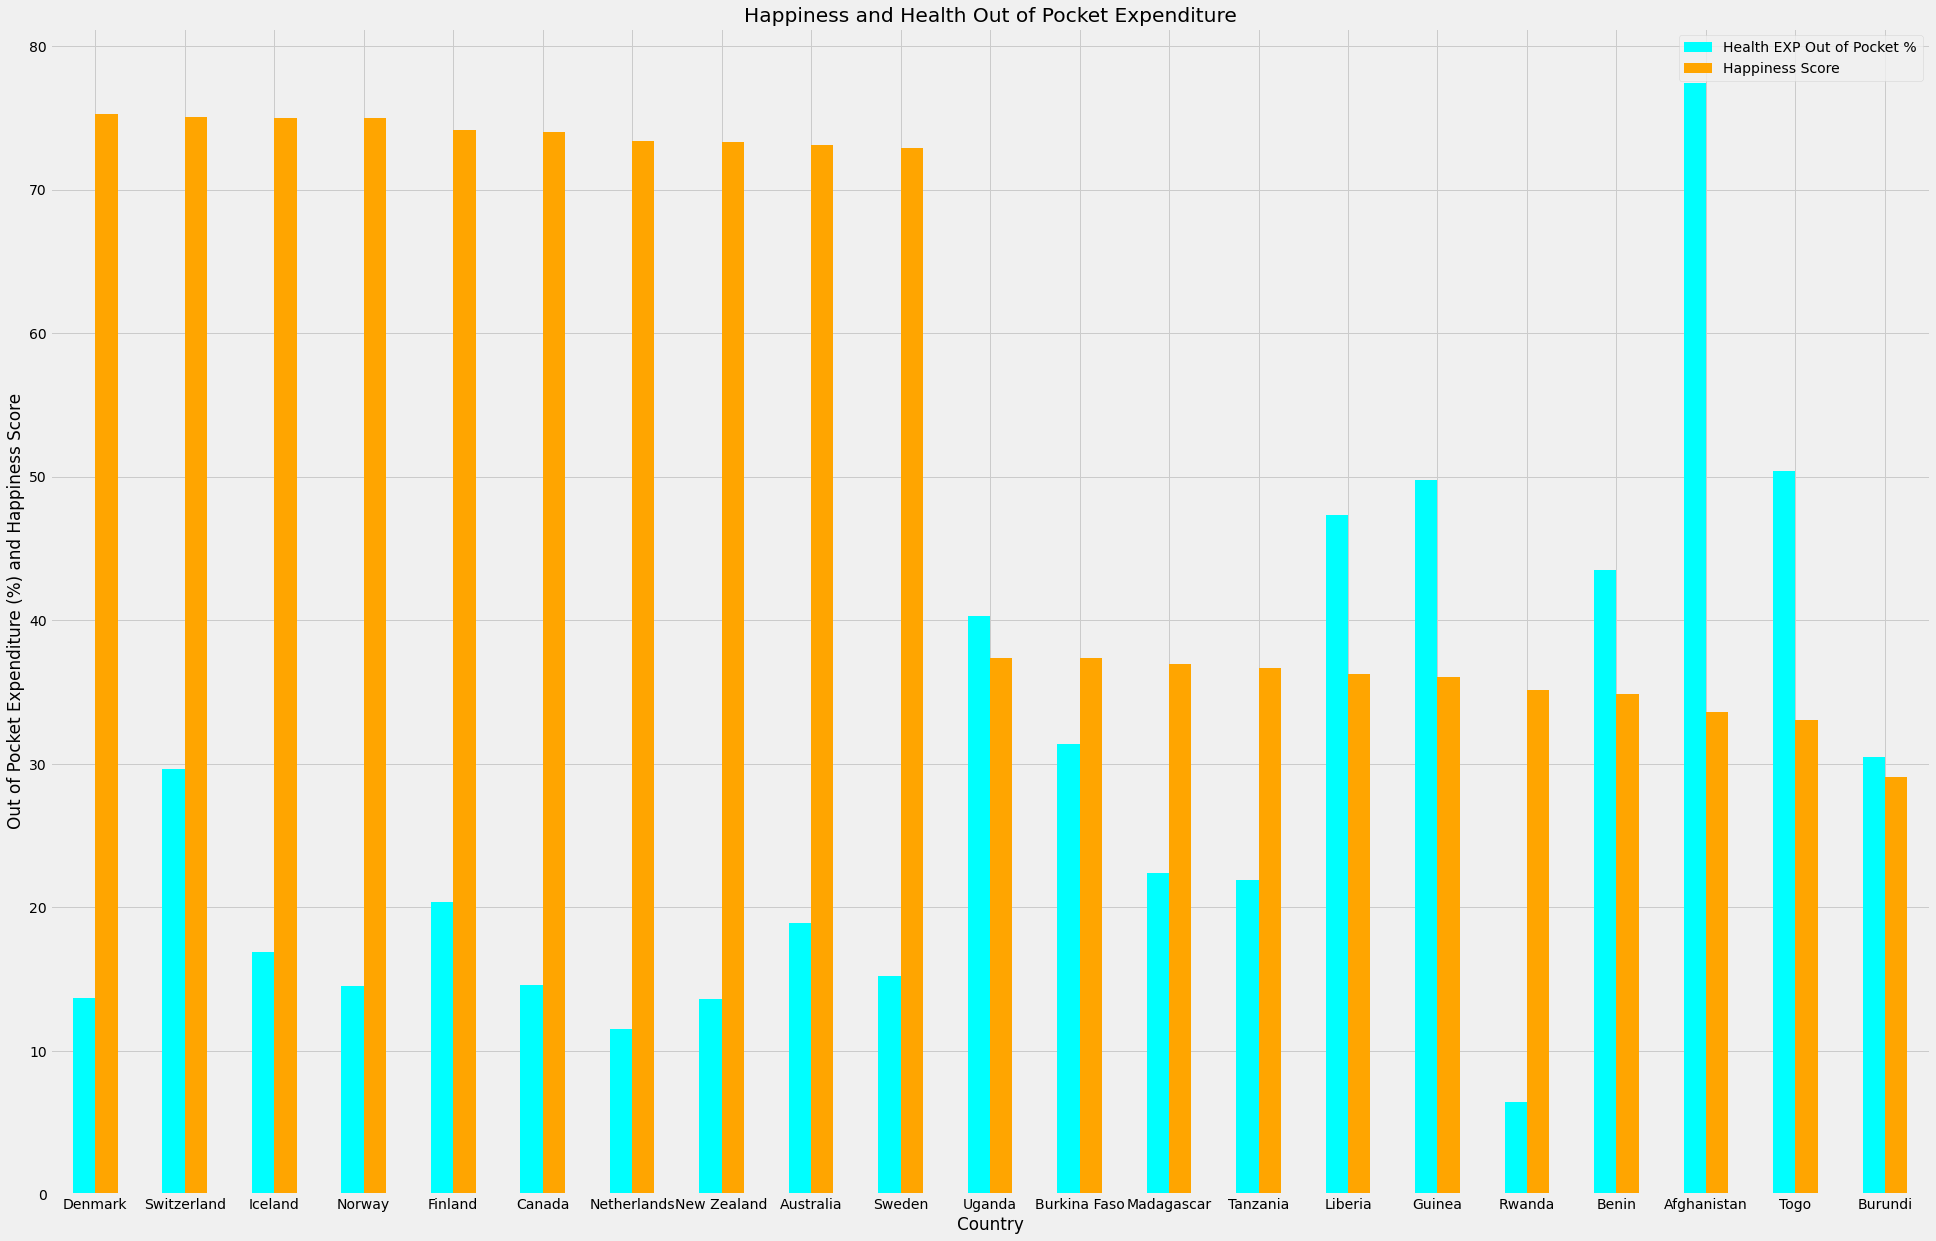

In [10]:
# Top 10 and Bottom 10 Countries DataFrame
cleaned_ope_df = pd.DataFrame(cleaned_df, columns=['Country', 'Happiness Score', 'Health Expenditure Public %', 'Health EXP Out of Pocket %', 'Health Expenditure Per Capita($)'], 
                        index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 132]
                       )
# Creating a DataFrame for Out of Pocket Expend and Happiness
top_bot_op_df = cleaned_ope_df.groupby(["Country"]).mean()["Health EXP Out of Pocket %"]
top_bot_happiness_df = cleaned_ope_df.groupby(["Country"]).mean()["Happiness Score"] * 10

top_bot_ophappy_df = pd.DataFrame({
    "Health EXP Out of Pocket %": top_bot_op_df,
    "Happiness Score": top_bot_happiness_df
}).sort_values("Happiness Score", ascending = False)

# Graphing Out of Pocket Expend and Happiness
style.use("fivethirtyeight")
ax = top_bot_ophappy_df.plot.bar(rot=0, figsize = (30,20), 
                                color={"Health EXP Out of Pocket %": "cyan", "Happiness Score": "orange"}
                               )
plt.title("Happiness and Health Out of Pocket Expenditure")
plt.ylabel("Out of Pocket Expenditure (%) and Happiness Score")

## Public Health Expenditure and Happiness

Text(0, 0.5, 'Government Health Expenditure (%) and Happiness Score')

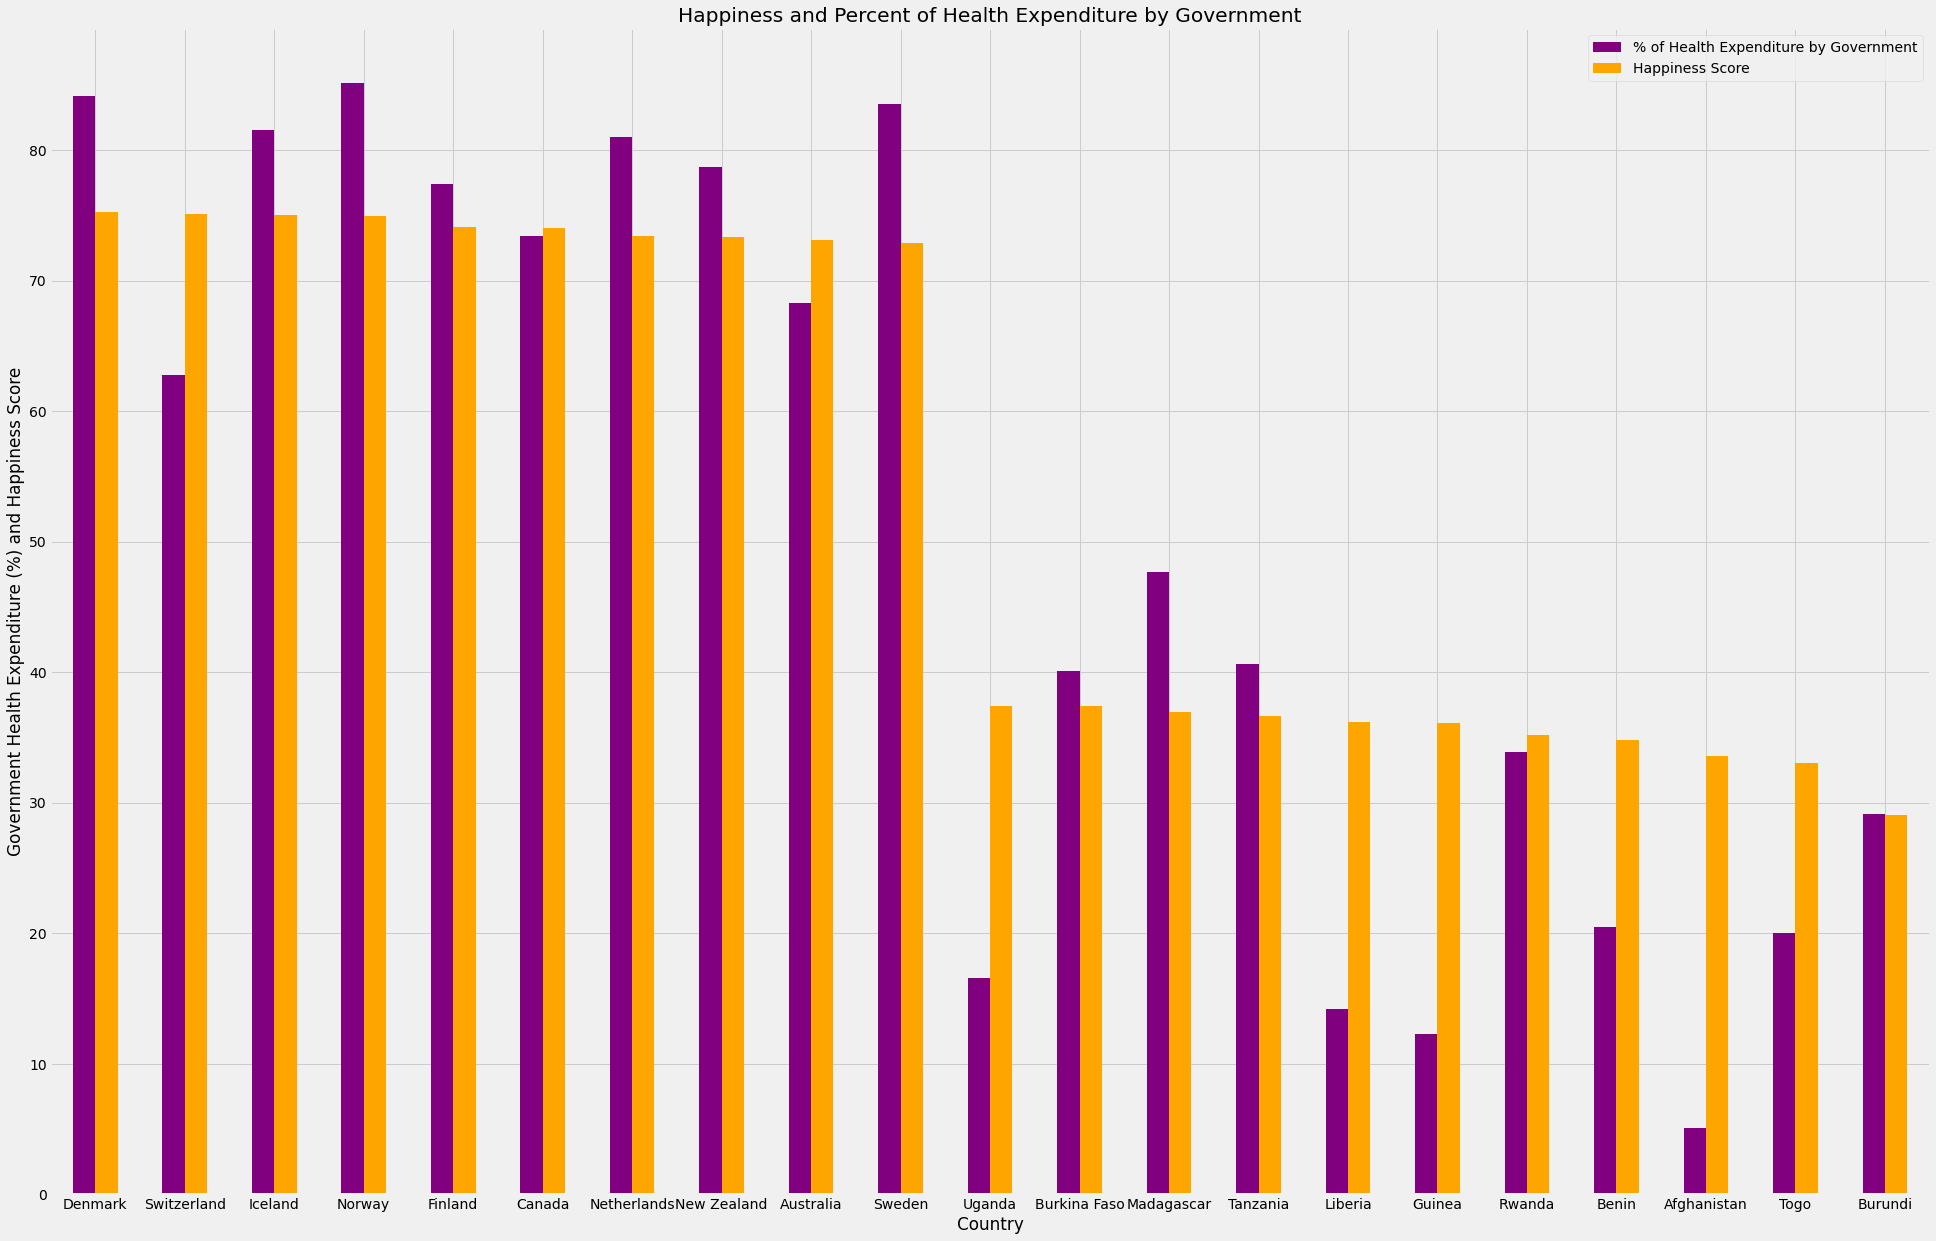

In [11]:
# DataFrame of Governemnt Expenditure and Happiness
top_bot_ge_df = cleaned_ope_df.groupby(["Country"]).mean()["Health Expenditure Public %"]
top_bot_happiness_df = cleaned_ope_df.groupby(["Country"]).mean()["Happiness Score"] * 10

top_bot_ophappy_df = pd.DataFrame({
    "% of Health Expenditure by Government": top_bot_ge_df,
    "Happiness Score": top_bot_happiness_df
}).sort_values("Happiness Score", ascending = False)

# Graphing Governemnt Expenditure and Happiness 
style.use("fivethirtyeight")
ax2 = top_bot_ophappy_df.plot.bar(rot=0, figsize = (30,20), 
                                color={"% of Health Expenditure by Government": "purple", "Happiness Score": "orange"}
                               )
plt.title("Happiness and Percent of Health Expenditure by Government")
plt.ylabel("Government Health Expenditure (%) and Happiness Score")

## Health Out of Pocket and Public Expenditure

Text(0, 0.5, 'Government and Personal Health Expenditure (%) and Happiness Score')

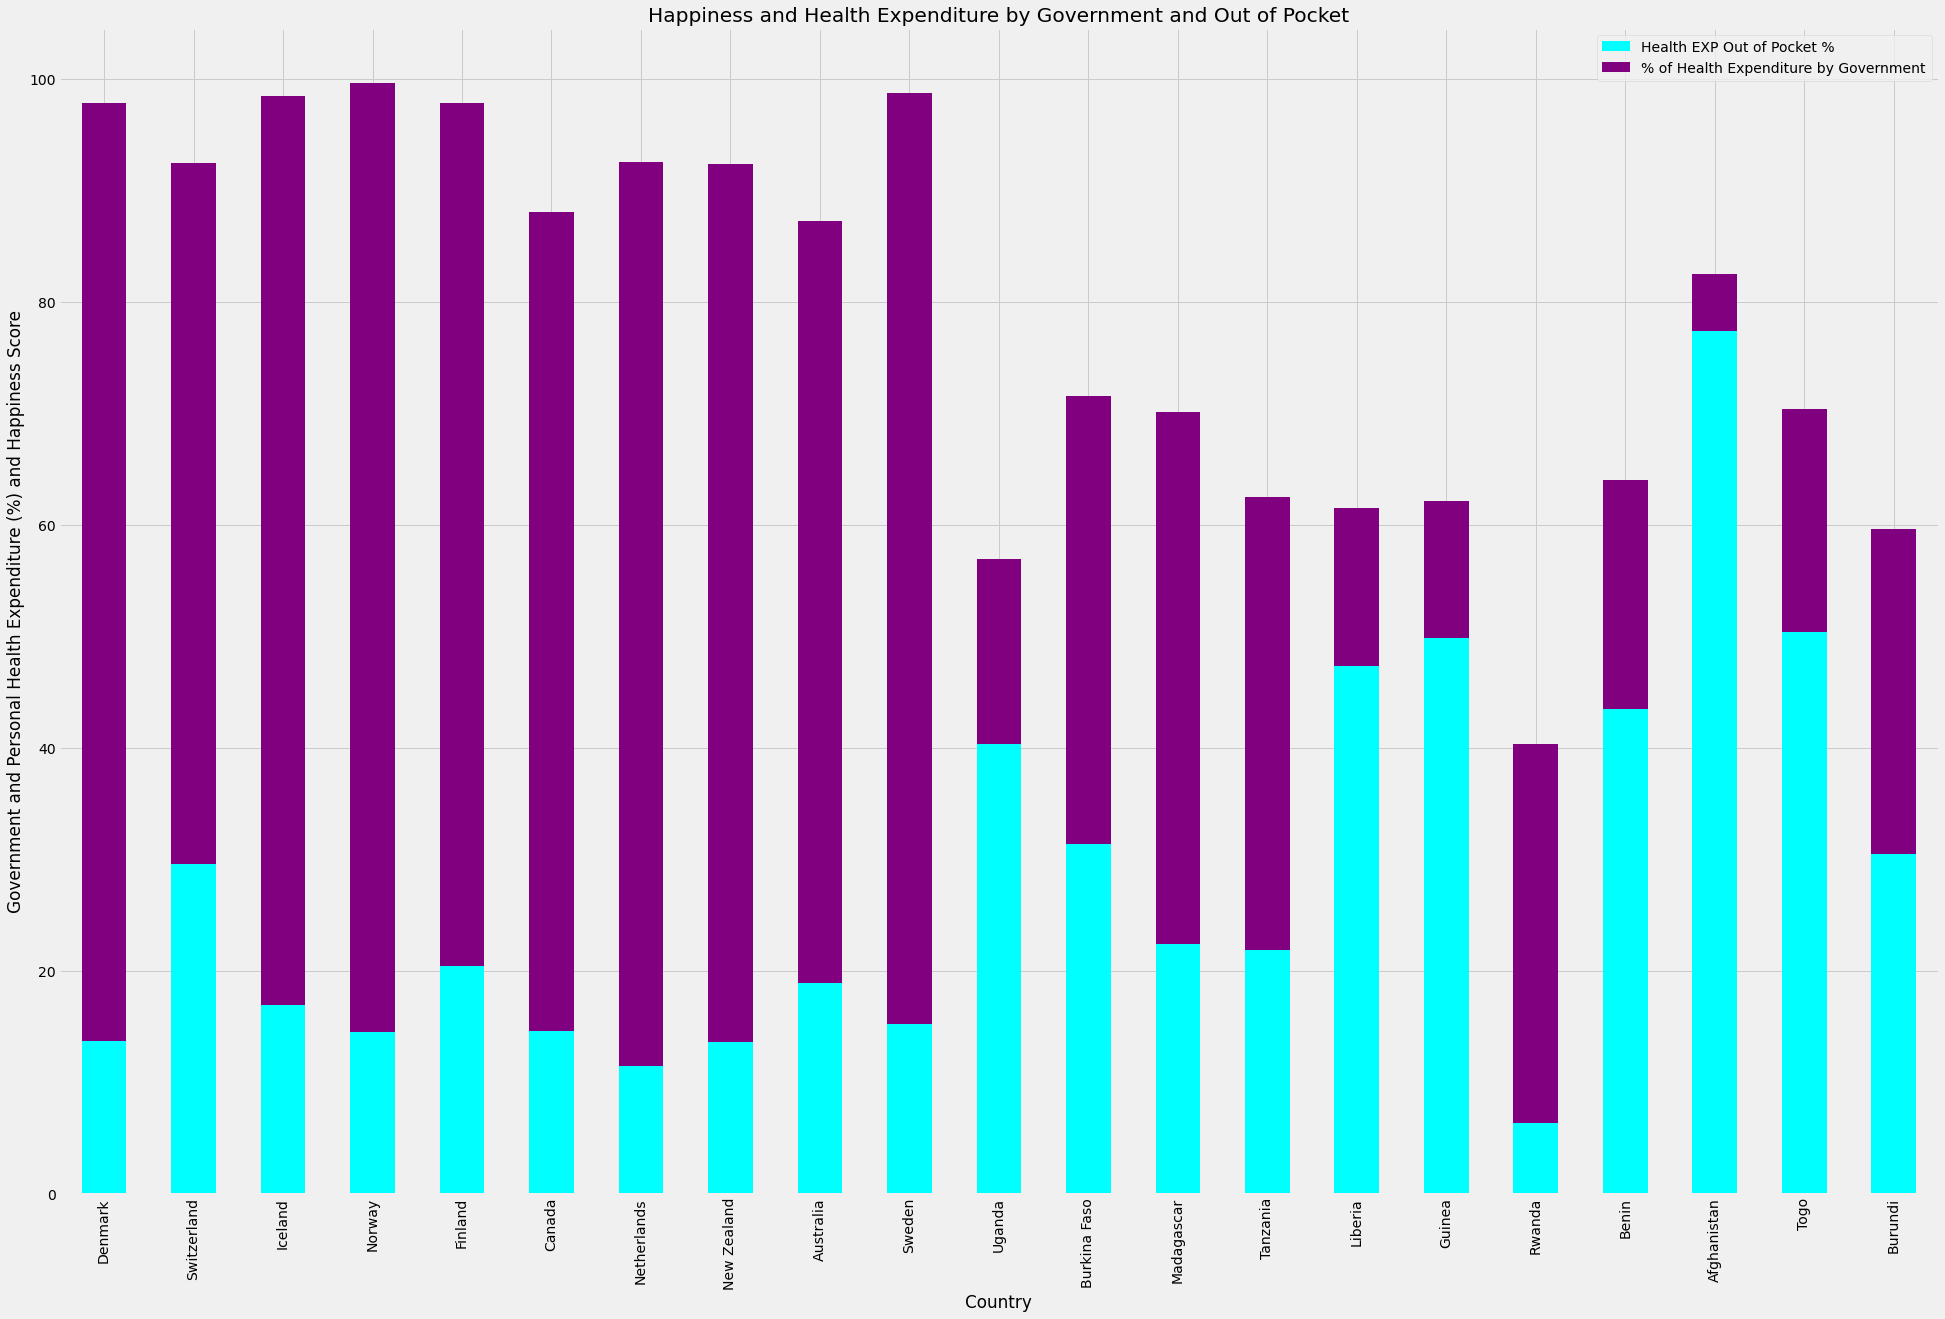

In [12]:
# DataFrame of Governemnt Expenditure and Happiness
country_ge_df = cleaned_ope_df.groupby(["Country"]).mean()["Health Expenditure Public %"]
country_op_df = cleaned_ope_df.groupby(["Country"]).mean()["Health EXP Out of Pocket %"]
#region_happiness_df = cleaned_ope_df.groupby(["Country"]).mean()["Happiness Score"] * 10

pub_ope_ophappy_df = pd.DataFrame({
    "Health EXP Out of Pocket %": country_op_df,
    "% of Health Expenditure by Government": country_ge_df
})
  
organized_pub_ope_ophappy_df = pub_ope_ophappy_df.reindex(["Denmark", "Switzerland", "Iceland", "Norway", "Finland",
                                                         "Canada", "Netherlands", "New Zealand", "Australia", "Sweden",
                                                         "Uganda", "Burkina Faso", "Madagascar", "Tanzania", "Liberia",
                                                         "Guinea", "Rwanda", "Benin", "Afghanistan", "Togo", "Burundi"
                                                        ])
# Graphing Governemnt Expenditure and Happiness
style.use("fivethirtyeight")
ax3 = organized_pub_ope_ophappy_df.plot.bar(stacked= True, figsize = (30,20), 
                                color={"% of Health Expenditure by Government": "purple", "Health EXP Out of Pocket %": "cyan"}
                               )
plt.title("Happiness and Health Expenditure by Government and Out of Pocket")
plt.ylabel("Government and Personal Health Expenditure (%) and Happiness Score")

## Sample Set of Out of Pocket Health Expenditure and Happiness

Text(0, 0.5, 'Out of Pocket Expenditure (%) and Happiness Score')

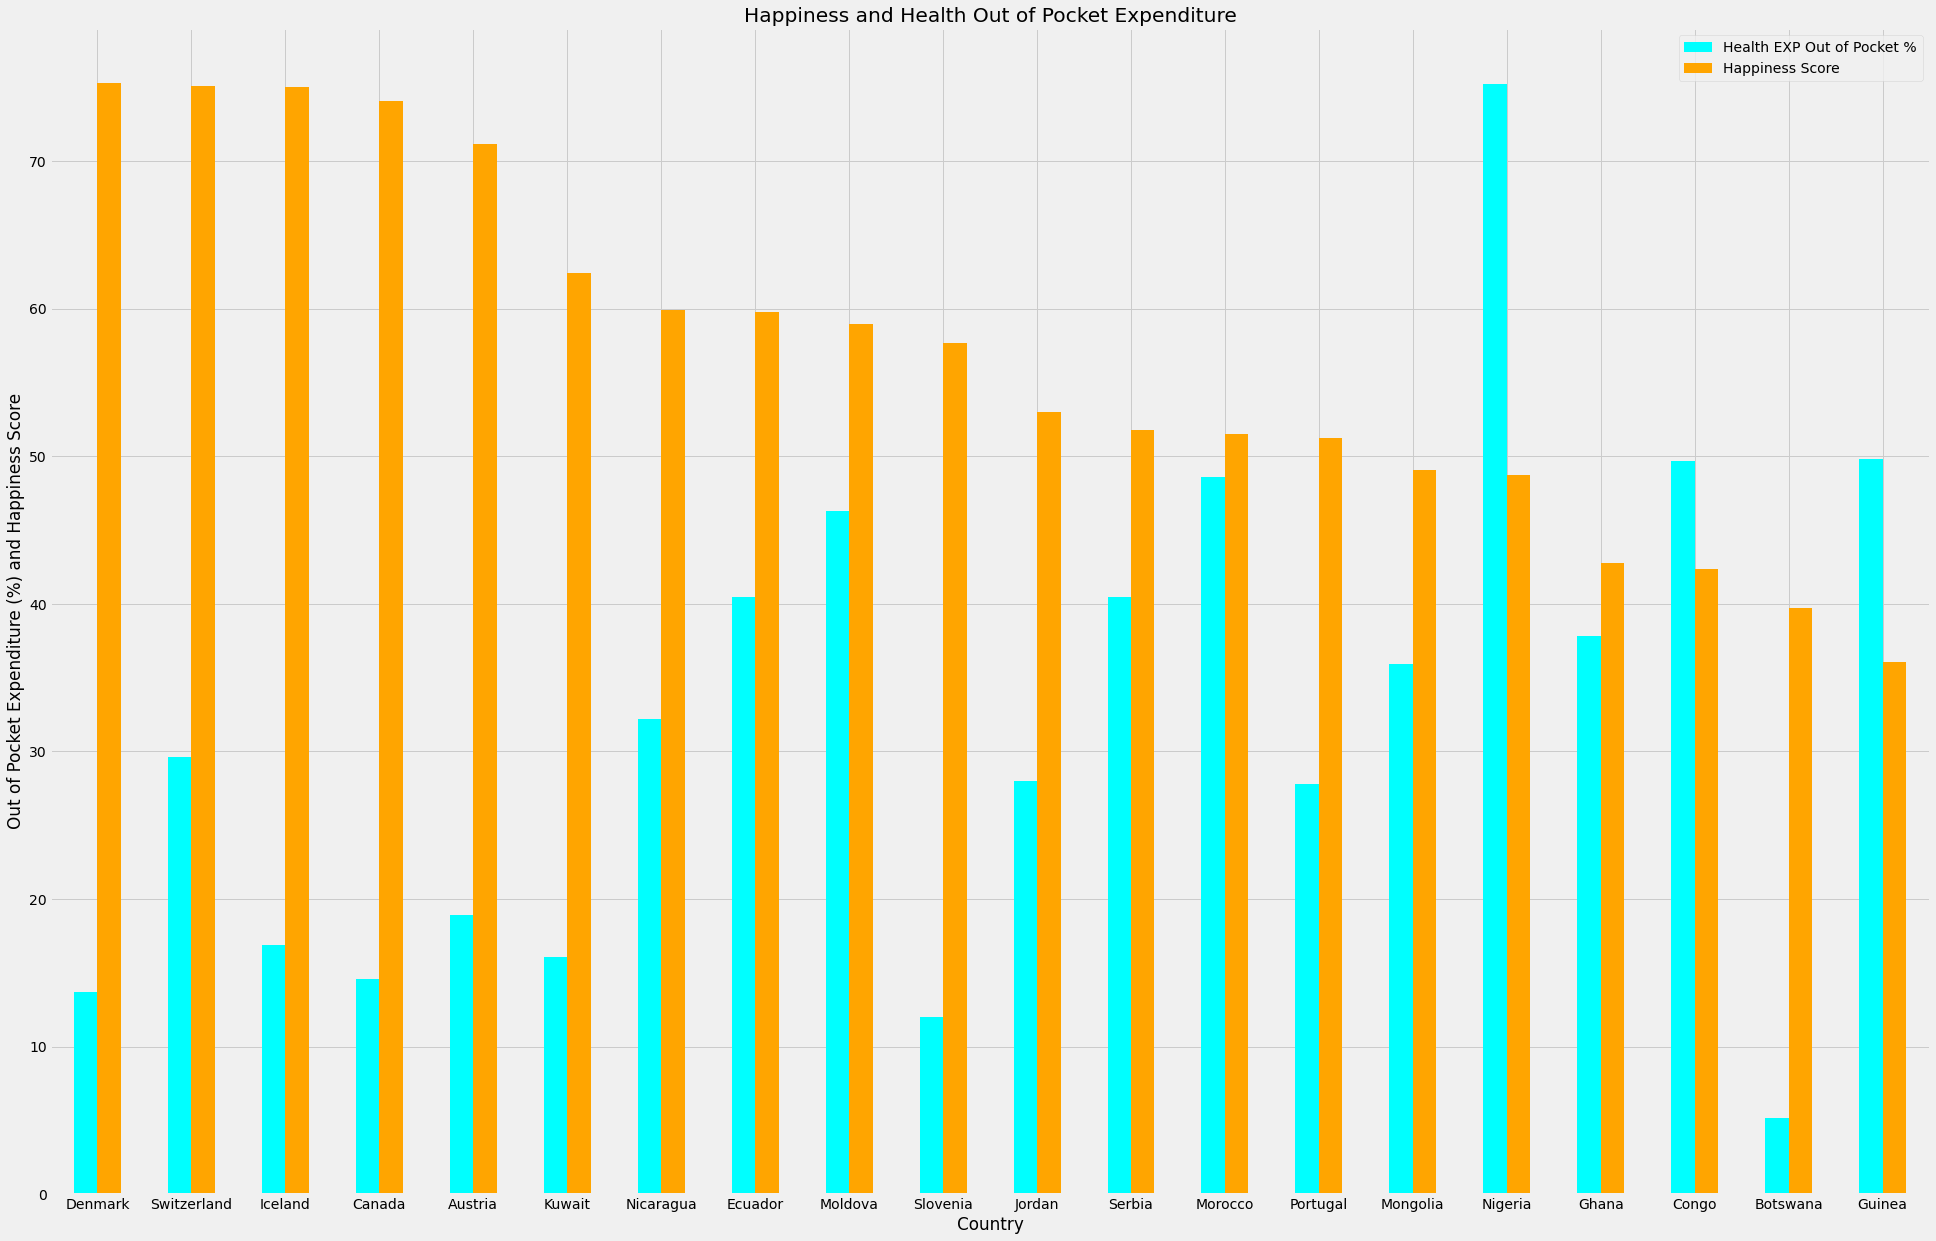

In [17]:
# Read in file
file_sample_df = pd.read_csv("Resources/sample.csv")

renamed_file_sample_df = file_sample_df.set_index("Country").rename(index={"Congo (Brazzaville)": "Congo"})

# Creating a DataFrame for Out of Pocket Expend and Happiness from Random Sample
samp_op_df = renamed_file_sample_df.groupby(["Country"]).mean()["Health EXP Out of Pocket %"]
samp_happiness_df = renamed_file_sample_df.groupby(["Country"]).mean()["Happiness Score"] * 10

samp_ophappy_df = pd.DataFrame({
    "Health EXP Out of Pocket %": samp_op_df,
    "Happiness Score": samp_happiness_df
}).sort_values("Happiness Score", ascending = False)


# Graphing Out of Pocket Expend and Happiness
style.use("fivethirtyeight")
samp_ax = samp_ophappy_df.plot.bar(rot=0, figsize = (30,20),
                                          color={"Health EXP Out of Pocket %": "cyan", "Happiness Score": "orange"}
                                         )
plt.title("Happiness and Health Out of Pocket Expenditure")
plt.ylabel("Out of Pocket Expenditure (%) and Happiness Score")

Text(0, 0.5, 'Government and Personal Health Expenditure (%) and Freedom Score')

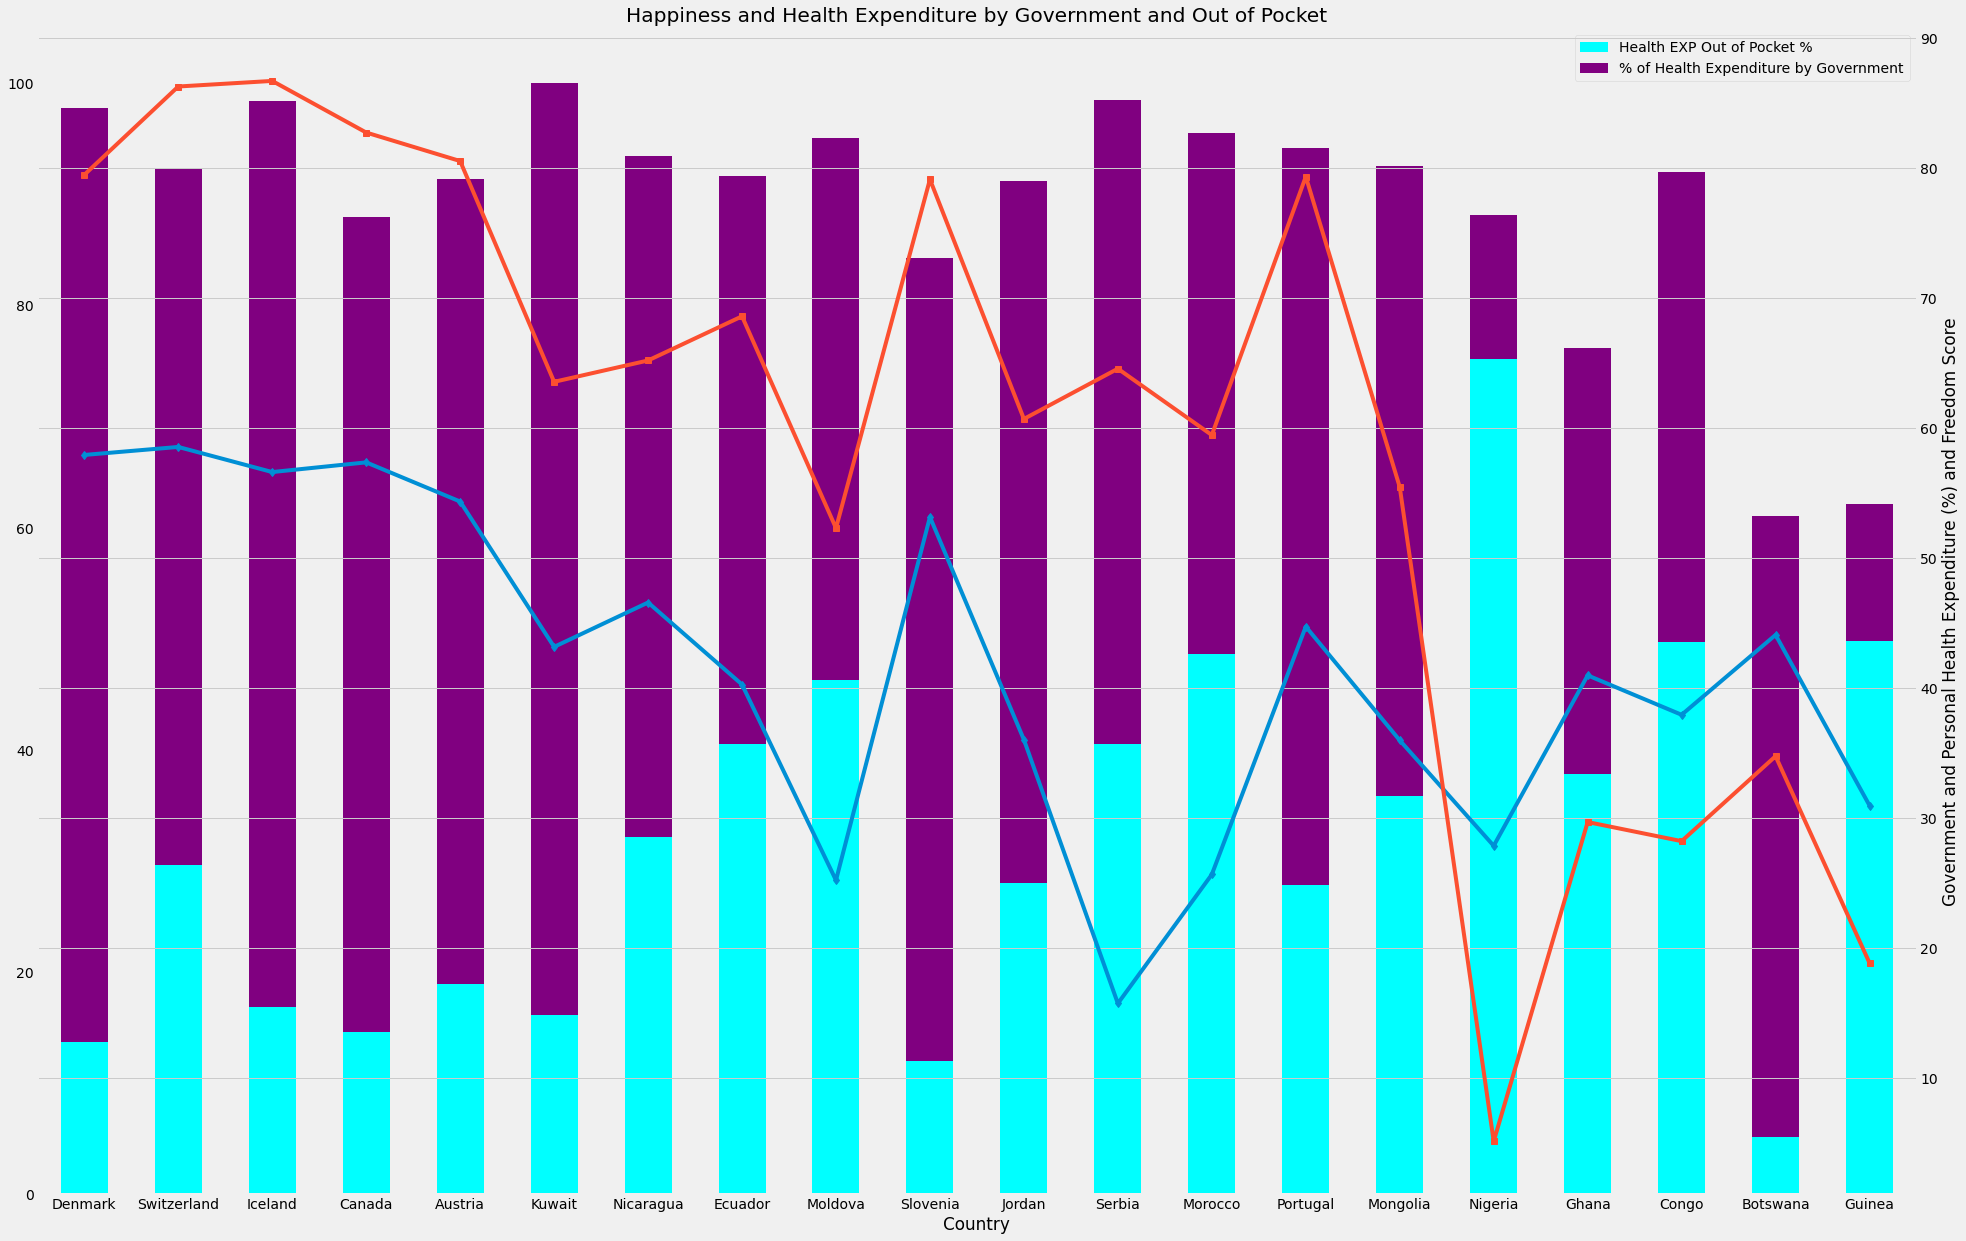

In [27]:
# Create DataFrame for Sample public and out of pocket
samp_ge_df = renamed_file_sample_df.groupby(["Country"]).mean()["Health Expenditure Public %"]
samp_op_df = renamed_file_sample_df.groupby(["Country"]).mean()["Health EXP Out of Pocket %"]
samp_free_df = renamed_file_sample_df.groupby(["Country"]).mean()["Freedom"]*100
samp_life_df = renamed_file_sample_df.groupby(["Country"]).mean()["Health (Life Expectancy)"]*100

samp_ophappy_df = pd.DataFrame({
    "Health EXP Out of Pocket %": samp_op_df,
    "% of Health Expenditure by Government": samp_ge_df,
    "Freedom Score": samp_free_df,
    "Health (Life Expectancy)": samp_life_df
    
})

organized_samp_pub_ope_ophappy_df = samp_ophappy_df.reindex(["Denmark", "Switzerland", "Iceland", "Canada", "Austria",
                                                         "Kuwait", "Nicaragua", "Ecuador", "Moldova", "Slovenia",
                                                         "Jordan", "Serbia", "Morocco", "Portugal", "Mongolia",
                                                         "Nigeria", "Ghana", "Congo", "Botswana", "Guinea"
                                                        ])

# Graphing Out of Pocket Expend and Happiness
style.use("fivethirtyeight")
organized_samp_pub_ope_ophappy_df[["Health EXP Out of Pocket %", "% of Health Expenditure by Government"]].plot.bar(stacked= True, figsize = (30,20), 
                                color={"% of Health Expenditure by Government": "purple", "Health EXP Out of Pocket %": "cyan"}
                               )
organized_samp_pub_ope_ophappy_df["Freedom Score"].plot(kind="line", marker = "d", secondary_y = True)
organized_samp_pub_ope_ophappy_df["Health (Life Expectancy)"].plot(kind="line", marker = "s", secondary_y = True)
plt.title("Happiness and Health Expenditure by Government and Out of Pocket")
plt.ylabel("Government and Personal Health Expenditure (%) and Freedom Score")